In [2]:
import pandas as pd
import numpy as np
import os
# import matplotlib.pyplot as plt
import warnings
import sklearn
# import seaborn as sns
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn import metrics as mt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [25]:

path  =  "C:\\Users\\sheri\\Documents\\Data Science\\Data Mining\\Homework/Project 1\\DataMiningProject2-master\\" 
scada =  pd.read_csv(path + "SCADAcombined2017_T014.csv")
alarms_desc = pd.read_csv(path + "Siemens_Fault_Code_Descriptions.csv")
print("DF scada is: ", scada.shape)
scada.head()

DF scada is:  (52462, 1291)


,TimeStamp,StationId,wtc_VoltPhR_min,wtc_VoltPhR_max,wtc_VoltPhR_mean,wtc_VoltPhR_stddev,wtc_VoltPhS_min,wtc_VoltPhS_max,wtc_VoltPhS_mean,wtc_VoltPhS_stddev,...,wtc_TLC_SpeedRed_min,wtc_TLC_SpeedRed_max,wtc_TLC_SpeedRed_mean,wtc_TLC_SpeedRed_stddev,wtc_TLC_DeltaDay_min,wtc_TLC_DeltaDay_max,wtc_TLC_DeltaDay_mean,wtc_TLC_DeltaDay_stddev,wtc_OrStpDat_Status_endvalue,wtc_OrStpDat_LampStat_endvalue
0,2017-01-01 00:00:00.000,2308974,399.3,402.4,400.4424,0.333343,399.4,402.0,400.7586,0.287372,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inactive,NotInst.
1,2017-01-01 00:10:00.000,2308974,398.2,401.2,399.2965,0.427948,397.8,401.0,399.6236,0.450038,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inactive,NotInst.
2,2017-01-01 00:20:00.000,2308974,397.7,400.0,398.5997,0.283229,397.4,399.7,398.7689,0.277164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inactive,NotInst.
3,2017-01-01 00:30:00.000,2308974,397.8,400.4,398.7805,0.315703,397.7,400.1,399.0097,0.317276,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inactive,NotInst.
4,2017-01-01 00:40:00.000,2308974,398.1,400.5,399.1493,0.326358,397.8,400.2,399.4183,0.313926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inactive,NotInst.


In [26]:
scada.dropna(thresh=10000,axis=1,inplace=True)

colsdrop = ['StationId', 'CommunicationId', 'NeighbourId',
           'NeighbourIdTwo', 'XPos', 'YPos', 'wtc_ActPower_min',
           'wtc_ActPower_max', 'wtc_ActPower_stddev',
           'wtc_AmpPhR_min', 'wtc_AmpPhR_max', 'wtc_AmpPhR_mean',
           'wtc_AmpPhR_stddev', 'wtc_AmpPhS_min', 'wtc_AmpPhS_max',
           'wtc_AmpPhS_mean', 'wtc_AmpPhS_stddev', 'wtc_AmpPhT_min',
           'wtc_AmpPhT_max', 'wtc_AmpPhT_mean', 'wtc_AmpPhT_stddev',
           'wtc_RawPower_min', 'wtc_RawPower_max', 'wtc_RawPower_mean',
           'wtc_RawPower_stddev', 'wtc_GenRpm_mean',
           'wtc_MainSRpm_mean', 'wtc_PitchRef_BladeA_mean',
           'wtc_PitchRef_BladeB_mean', 'wtc_PitchRef_BladeC_mean','wtc_TwrHumid_mean', 
            'wtc_PitcPosA_mean','wtc_PitcPosB_mean', 'wtc_PitcPosC_mean','wtc_BoostKWh_endvalue',
           'wtc_GeOilTmp_mean','wtc_HubTemp_mean','wtc_NacelTmp_mean','wtc_ConvWTmp_mean',
           'wtc_MainBTmp_mean','WindDir_Angle_3D_Avg','WindDir_Angle_3D_Std','WindDir_Angle_3D_Avg',
           'WindDir_Angle_3D_Std']

scada.drop(colsdrop,axis=1,inplace=True)

In [27]:

scada.dropna(inplace=True)
scada['wtc_AlarmCde_endvalue'] = scada['wtc_AlarmCde_endvalue'].astype(int)

df = scada.merge(alarms_desc, 
         left_on = 'wtc_AlarmCde_endvalue', 
         right_on="Code",
         how='left')

# del alarms_desc

df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])
df.set_index('TimeStamp', inplace=True)
df.index

df.dropna(inplace=True)

print(df.shape)
df.describe().transpose()

(52751, 649)


,count,mean,std,min,25%,50%,75%,max
wtc_VoltPhR_min,52751.0,3.970191e+02,10.366360,2.000000e-01,3.945000e+02,3.967000e+02,3.996000e+02,4.253000e+02
wtc_VoltPhR_max,52751.0,4.001382e+02,8.698037,5.000000e-01,3.974000e+02,3.998000e+02,4.028000e+02,4.371000e+02
wtc_VoltPhR_mean,52751.0,3.981882e+02,8.849722,3.167467e-01,3.954531e+02,3.978480e+02,4.007914e+02,4.323134e+02
wtc_VoltPhR_stddev,52751.0,3.678904e-01,2.450194,6.156275e-02,2.721381e-01,3.036560e-01,3.501088e-01,2.042891e+02
wtc_VoltPhS_min,52751.0,3.967500e+02,10.350673,2.000000e-01,3.942000e+02,3.964000e+02,3.994000e+02,4.246000e+02
wtc_VoltPhS_max,52751.0,3.998094e+02,8.727320,5.000000e-01,3.971000e+02,3.995000e+02,4.025000e+02,4.361000e+02
wtc_VoltPhS_mean,52751.0,3.982932e+02,8.871922,3.025900e-01,3.955532e+02,3.979573e+02,4.009250e+02,4.318290e+02
wtc_VoltPhS_stddev,52751.0,3.444133e-01,2.448778,6.254655e-02,2.410050e-01,2.802810e-01,3.329168e-01,2.040560e+02
wtc_VoltPhT_min,52751.0,3.975466e+02,10.183507,1.000000e-01,3.956000e+02,3.974000e+02,3.997000e+02,4.258000e+02
wtc_VoltPhT_max,52751.0,4.001817e+02,8.478538,5.000000e-01,3.979000e+02,4.000000e+02,4.023000e+02,4.374000e+02


In [28]:
# Create new variables

# Rounded Wind Speed for GroupBy
df['WindSpeed_adj'] = df['wtc_AcWindSp_mean'].round(1)

# Wind changes at night
df['HourOfDay'] = df.index.hour

# Yaw Error
df['YawError'] = df['wtc_YawPos_mean'] - df['WindDir_ICEFREE_D1_WVT']

# Adding boost to ref set point
df['BoostedRef'] = df['wtc_BoostAva_mean'] + df['wtc_PowerRef_endvalue']

# Wind Sheer
df['WindSheer1'] = np.log(df['WS_Thies_80m_Avg'] / df['WS_Thies_26m_Avg']) / np.log(80/26)
# df['WindSheer2'] = np.log(df['WS_Thies_80m_Avg'] / df['WS_Thies_60m_Avg']) / np.log(80/60)

# Fault Types
df = df.rename(columns={'Fault Type': 'Fault_Type'})
df['Fault_Type'] = df['Fault_Type'].replace('W','0')
df['Fault_Type'] = df['Fault_Type'].astype(int)

# Boosted Power Delta
df['PowerDelta'] = df['BoostedRef'] - df['wtc_ActPower_mean']

available = (df['Fault_Type'] != 1) & (df['wtc_ScInOper_timeon'] == 600)
df['Available'] = [1 if x == True else 0 for x in available]

# Icing
icing = (df['AirTC_3m_Avg'] < 3) & (abs(df['WS_ICEFREE_Avg'] - df['WS_Thies_80m_Avg']) > 1)
df['Icing'] = [1 if x == True else 0 for x in icing]

# Air Density
df['Air_density'] = (df['BP_mbar_76m_Avg']*100)/((df['AirTC_3m_Avg']+273.15)*287.05)

# Air Density adjusted Wind Speed
df['AdjTurbineWS'] = df['wtc_AcWindSp_mean']*(np.power(df['Air_density'],(1/3)))

# Turbulence
df['TurbulenceMet'] = df['WS_Thies_80m_Std'] / df['WS_Thies_80m_Avg']
df['TurbulenceTurbine'] = df['wtc_AcWindSp_stddev'] / df['wtc_AcWindSp_mean']

# df['MainBearingFault'] = [1 if x == 64038 else 0 for x in df['Code']]

df.dropna(inplace=True)

C:\Users\sheri\venv\project1\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


In [29]:
# Calculating Derate Conditions

#derate = (df['wtc_ActPower_mean'] == df['wtc_PowerRef_endvalue']) & (df['wtc_PowerRef_endvalue'] < 2300)
#derate = (df['wtc_PowerRef_endvalue'] < 2300)
derate = (df['PowerDelta'] < 0) & (df['Available'] == 1) & (df['BoostedRef'] < 2300) #df['BoostedRef'].max())
df['Derated'] = [1 if x == True else 0 for x in derate]

percent = (df['Derated'].sum() / len(df))*100
print('Percent of Derated Data:',percent,"%")

Percent of Derated Data: 9.900329693366112 %


In [30]:
# Use cleaned data set for calculating expected energy
clean = (df['Available'] == 1) & (df['wtc_PowerRef_endvalue'] == 2300) & (df['Icing'] == 0) & (df['wtc_BoostAva_mean'] == 0)
df_clean = df[clean]
pcurve95 = df_clean.groupby('WindSpeed_adj').quantile(q=0.95)
pcurve75 = df_clean.groupby('WindSpeed_adj').quantile(q=0.75)
pcurve50 = df_clean.groupby('WindSpeed_adj').median()
pcurve25 = df_clean.groupby('WindSpeed_adj').quantile(q=0.25)
pcurve5 = df_clean.groupby('WindSpeed_adj').quantile(q=0.05)

x0: 9.013482544002846
k: 0.6647066200991812
Cap: 2307.75965


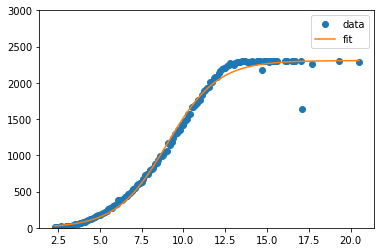

In [31]:
# Historical 5th Percentile

import pylab
from scipy.optimize import curve_fit
#from sklearn import preprocessing

def sigmoid(x, x0, k):
    #cap = 2300
    y = cap / (1 + np.exp(-k*(x-x0)))
    return y

xdata = pcurve5.index.values
ydata = pcurve5['wtc_ActPower_mean'].values
cap = np.max(pcurve5['wtc_ActPower_mean'].values)

popt, pcov = curve_fit(sigmoid, xdata, ydata)

pcurve5_x0 = popt[0]
pcurve5_k = popt[1]
pcurve5_cap = cap
print('x0:',pcurve5_x0)
print('k:',pcurve5_k)
print('Cap:',pcurve5_cap)

x = xdata
y = sigmoid(x,*popt)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(xdata,y, label='fit')
pylab.ylim(0, 3000)
pylab.legend(loc='best')
pylab.show()

In [32]:
def PowerCurve(wind, x0,k,cap):
    y = cap / (1 + np.exp(-k*(wind-x0)))
    return y

df['ExpectedEnergy_ref'] = df.apply(lambda x: PowerCurve(wind=x['wtc_AcWindSp_mean'], 
                                                          x0=7.70514731, 
                                                          k=0.85471648, 
                                                          cap=2300), 
                                     axis = 1)
df['ExpectedEnergy_5th'] = df.apply(lambda x: PowerCurve(wind=x['wtc_AcWindSp_mean'], 
                                                          x0=pcurve5_x0, 
                                                          k=pcurve5_k,
                                                          cap=pcurve5_cap), 
                                     axis = 1)

In [33]:

# Make labels# Make l 
# insipred by: https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns

def make_class(row):
    if row["wtc_ActPower_mean"] <= row["ExpectedEnergy_5th"]:
        return "1"
    else:
        return "0"

df["Underperformance"] = df.apply(lambda x: make_class(x), axis=1)
df['Underperformance'] = df['Underperformance'].astype(int)

percent = (df['Underperformance'].sum() / len(df))*100
print('Percent of Under Performance Data:',percent,"%")

Percent of Under Performance Data: 26.82522440112058 %


In [34]:
#Encode the labels (examples found on SKLearn website... need to find address)
le = preprocessing.LabelEncoder()
le.fit(list(df["Underperformance"].unique()))
# df_test["target"] = le.transform(df_test["Underperformance"])
df["target"] = le.transform(df["Underperformance"])
df = df.replace([np.inf, -np.inf], np.nan).dropna()



#Now the other variables used to train the model need to scaled. First, however, un-need variables need to be dropped.
y = df["target"]
# y2= df['target']



# df3 = df.drop(['wtc_GeOilTmp_mean',
#        'wtc_HubTemp_mean', 'wtc_NacelTmp_mean', 'wtc_ConvWTmp_mean',
#        'wtc_HydOilTm_mean', 'wtc_MainBTmp_mean', 'wtc_AlarmCde_endvalue',
#        'wtc_ScInOper_timeon', 'WindSpeed_adj','ExpectedEnergy_ref', 'ExpectedEnergy_25th',
#        'ExpectedEnergy_median', 'Underperformance','wtc_ActPower_mean','Fault_Type','Code', 
#         'Description', 'Fault_Type','Name','Derated','target'], axis=1)

# keepcols2 = ["Air_density", "wtc_ScInOper_timeon", "AirTC_3m_Avg", "WS_Thies_60m_Avg", 
#              "WS_ICEFREE_Avg", "BP_mbar_76m_Avg"]

keepcols = ['BoostedRef', 'WindSheer1',
            'wtc_AcWindSp_mean','wtc_NacelPos_mean','wtc_ScInOper_timeon', 
            'WS_Thies_80m_Avg', 'WS_Thies_60m_Avg', 'WS_ICEFREE_Avg',
           'BP_mbar_76m_Avg', 'AirTC_3m_Avg','Icing','Air_density']

data = df[keepcols]


X = preprocessing.scale(data) 
# X2 = preprocessing.scale(df3)

data.columns

Index(['BoostedRef', 'WindSheer1', 'wtc_AcWindSp_mean', 'wtc_NacelPos_mean',
       'wtc_ScInOper_timeon', 'WS_Thies_80m_Avg', 'WS_Thies_60m_Avg',
       'WS_ICEFREE_Avg', 'BP_mbar_76m_Avg', 'AirTC_3m_Avg', 'Icing',
       'Air_density'],
      dtype='object')

In [65]:
#Code from https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
y_a = np.array(y, dtype=pd.Series)
print(y_a)

train_y_a, test_y_a, train_data, test_data = train_test_split(y_a, data, test_size = 0.25, random_state = 42)
train_y_r = np.atleast_2d(train_y_a)
test_y_r = np.atleast_2d(test_y_a)
print(train_y_r)
print(test_y_r)
train_y_s = train_y_r.reshape(-1,1)
print(train_y_s)
test_y_s = test_y_r.reshape(-1,1)
print(test_y_s)

[0 0 0 ... 1 1 1]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 1 0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]


In [69]:
print('Training Features Shape:', train_y_s.shape)
print('Training Labels Shape:', train_data.shape)
print('Testing Features Shape:', test_y_s.shape)
print('Testing Labels Shape:', test_data.shape)

Training Features Shape: (39348, 1)
Training Labels Shape: (39348, 12)
Testing Features Shape: (13116, 1)
Testing Labels Shape: (13116, 12)


In [87]:
# line 32 and 33 from Kyle provide the baseline error
# Percent of Under Performance Data: 26.82522440112058 %
#y_a_list = np.array(y_list, dtype=pd.Series)
y_list = list(data.columns)
#y_2_list = np.atleast_2d(y_list)
# The baseline predictions are the historical averages
baseline_preds = test_y_s[:, y_list.index('BoostedRef')]
baseline_2_preds = np.atleast_2d(baseline_preds)
baseline_preds = baseline_2_preds.reshape(-1,1)
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_data)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  BoostedRef             1739.56
WindSheer1                0.44
wtc_AcWindSp_mean         7.37
wtc_NacelPos_mean       167.83
wtc_ScInOper_timeon     531.66
WS_Thies_80m_Avg          6.15
WS_Thies_60m_Avg          5.54
WS_ICEFREE_Avg            6.23
BP_mbar_76m_Avg         948.46
AirTC_3m_Avg             18.64
Icing                     0.27
Air_density               0.87
dtype: float64


In [73]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)


# Train the model on training data
rf.fit(train_y_s, train_data);

In [89]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_y_s)

# Calculate the absolute errors
errors = abs(predictions - test_data)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: BoostedRef             564.49
WindSheer1               0.21
wtc_AcWindSp_mean        2.77
wtc_NacelPos_mean       68.48
wtc_ScInOper_timeon     78.34
WS_Thies_80m_Avg         2.05
WS_Thies_60m_Avg         1.83
WS_ICEFREE_Avg           1.98
BP_mbar_76m_Avg          3.45
AirTC_3m_Avg             7.24
Icing                    0.01
Air_density              0.03
dtype: float64 degrees.


In [90]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_data)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: BoostedRef                   -inf
WindSheer1              31.660000
wtc_AcWindSp_mean      -89.860000
wtc_NacelPos_mean     -614.500000
wtc_ScInOper_timeon          -inf
WS_Thies_80m_Avg        50.870000
WS_Thies_60m_Avg        52.580000
WS_ICEFREE_Avg          52.060000
BP_mbar_76m_Avg         99.620000
AirTC_3m_Avg                 -inf
Icing                        -inf
Air_density             97.350000
dtype: float64 %.


In [7]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = df.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = y_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

ModuleNotFoundError: No module named 'pydot'